Boston House Price prediction


Importing Necessary Modelues

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importing Dataset for Analysis and Prediction

In [2]:
data = pd.read_csv('/kaggle/input/boston-house/HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Describing Data and his Characterstics

In [3]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
data.shape

(506, 14)

In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Displaying Data Range

min_values = data.min()
max_values = data.max()
val = pd.DataFrame({'Min':min_values,'Max':max_values})
print(val)

               Min       Max
CRIM       0.00632   88.9762
ZN         0.00000  100.0000
INDUS      0.46000   27.7400
CHAS       0.00000    1.0000
NOX        0.38500    0.8710
RM         3.56100    8.7800
AGE        2.90000  100.0000
DIS        1.12960   12.1265
RAD        1.00000   24.0000
TAX      187.00000  711.0000
PTRATIO   12.60000   22.0000
B          0.32000  396.9000
LSTAT      1.73000   37.9700
MEDV       5.00000   50.0000


Removing Nan Values

In [7]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')

In [9]:
data['CRIM'] = imp_median.fit_transform(data[['CRIM']])

In [10]:
data['ZN'] = imp_mode.fit_transform(data[['ZN']])

In [11]:
data['INDUS'] = imp_mean.fit_transform(data[['INDUS']])

In [12]:
data['CHAS'] = imp_mode.fit_transform(data[['CHAS']])

In [13]:
data['AGE'] = imp_median.fit_transform(data[['AGE']])

In [14]:
data['LSTAT'] = imp_mean.fit_transform(data[['LSTAT']])

In [15]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# Data after Preprocessing
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


 Visualizing to describe the data

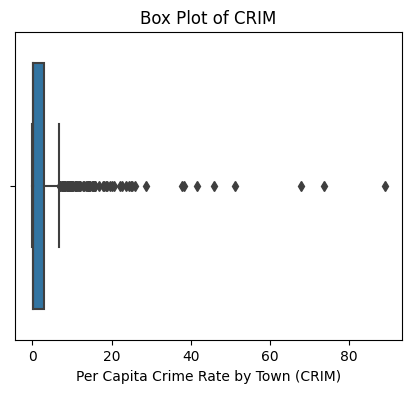

In [17]:
# Box plot of CRIM

plt.figure(figsize=(5,4))
sns.boxplot(x=data['CRIM'])
plt.title('Box Plot of CRIM')
plt.xlabel('Per Capita Crime Rate by Town (CRIM)')
plt.show()

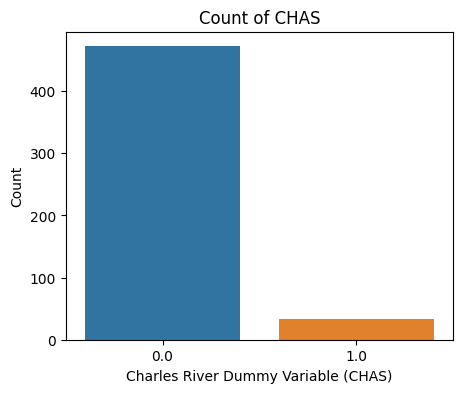

In [18]:
# Bar plot of CHAS

plt.figure(figsize=(5,4))
sns.countplot(x='CHAS', data=data)
plt.title('Count of CHAS')
plt.xlabel('Charles River Dummy Variable (CHAS)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


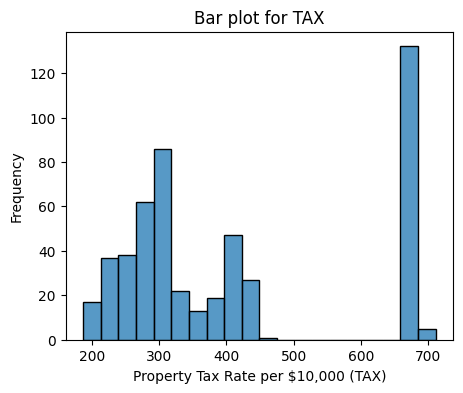

In [19]:
# Bar Plot for Tax

plt.figure(figsize=(5, 4))
sns.histplot(data['TAX'], bins=20)
plt.title('Bar plot for TAX')
plt.xlabel('Property Tax Rate per $10,000 (TAX)')
plt.ylabel('Frequency')
plt.show()

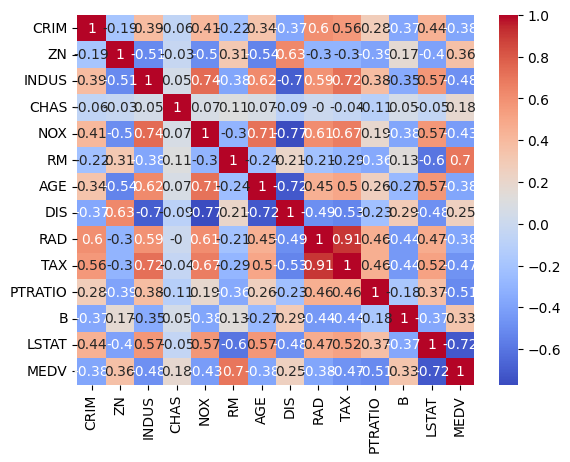

In [20]:
#Correlation matrix

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


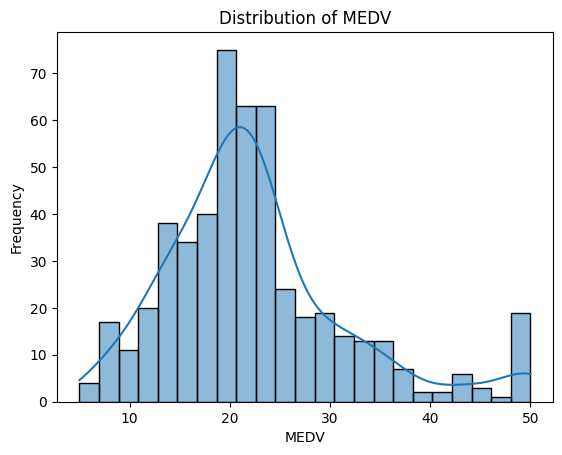

In [21]:
# Histogram for Medv

sns.histplot(data['MEDV'], kde=True)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

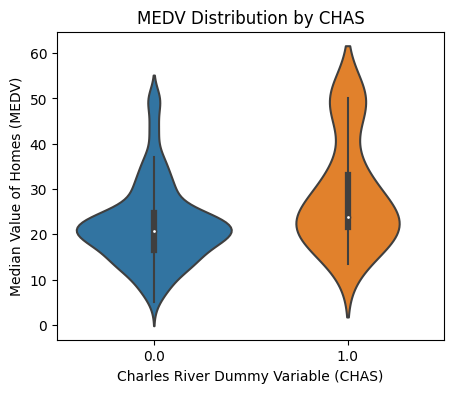

In [22]:
# Violin plot for Medv and CHAS

plt.figure(figsize=(5,4))
sns.violinplot(x='CHAS', y='MEDV', data=data)
plt.title('MEDV Distribution by CHAS')
plt.xlabel('Charles River Dummy Variable (CHAS)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


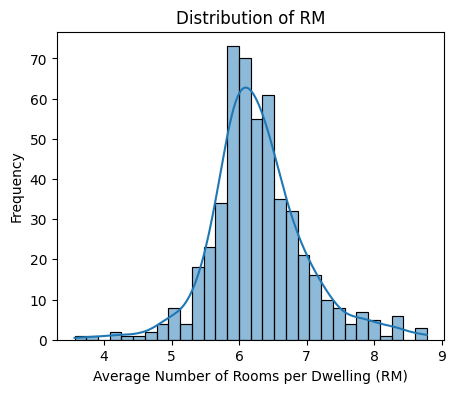

In [23]:
# Histogram of RM

plt.figure(figsize=(5,4))
sns.histplot(data['RM'], bins=30, kde=True)
plt.title('Distribution of RM')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Frequency')
plt.show()

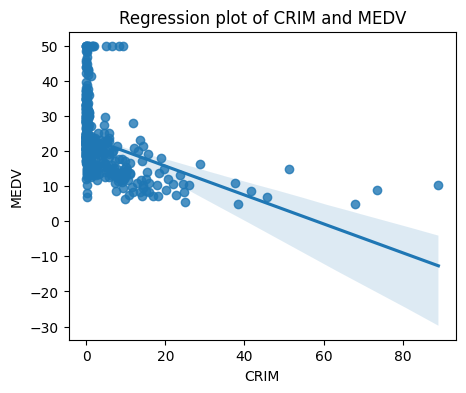

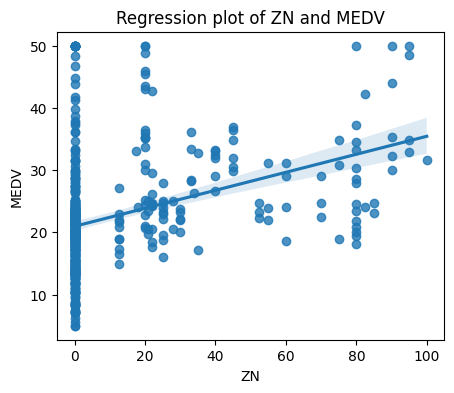

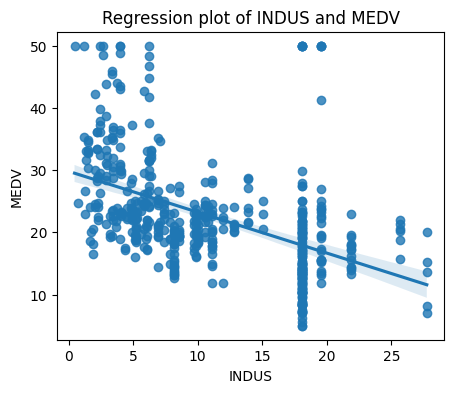

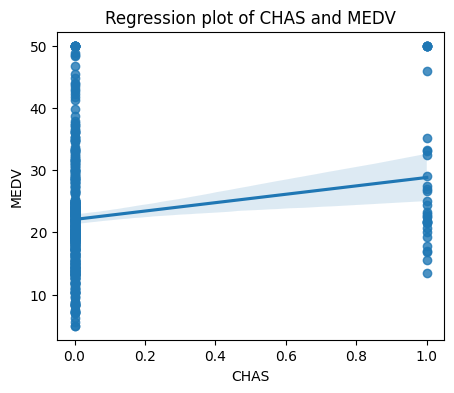

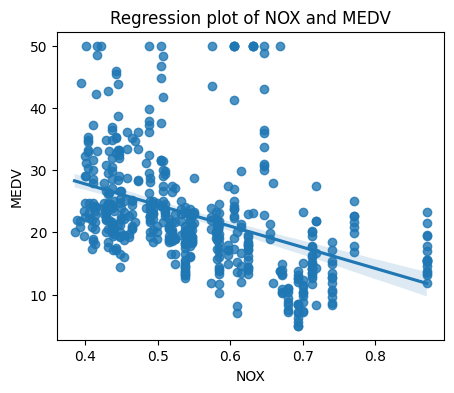

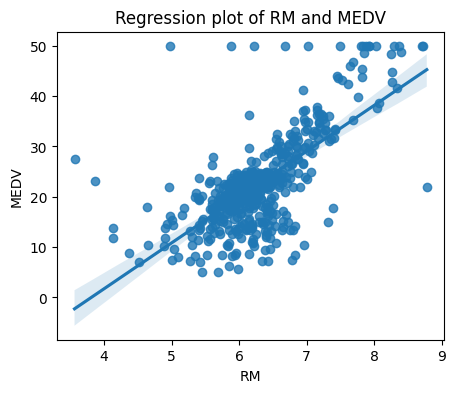

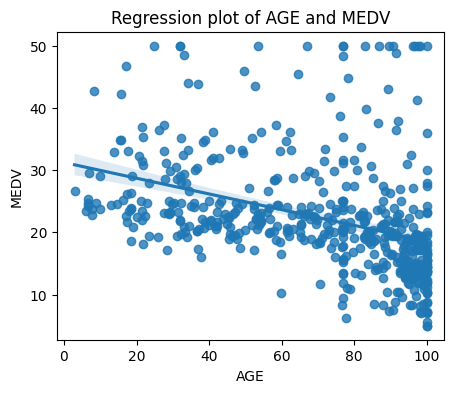

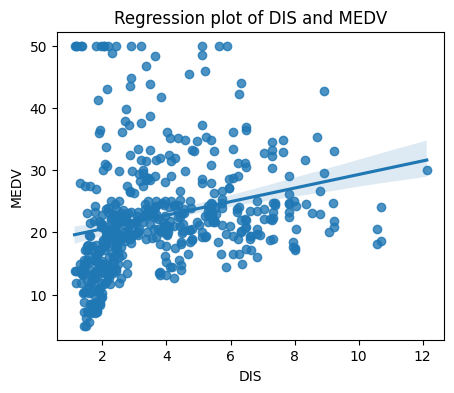

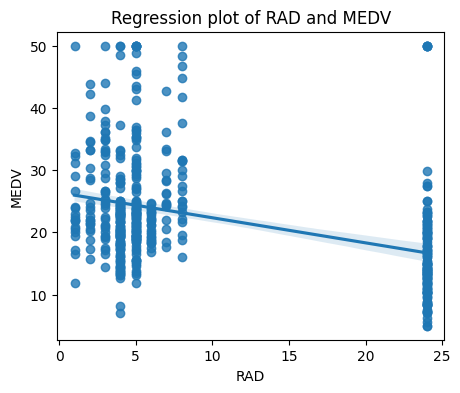

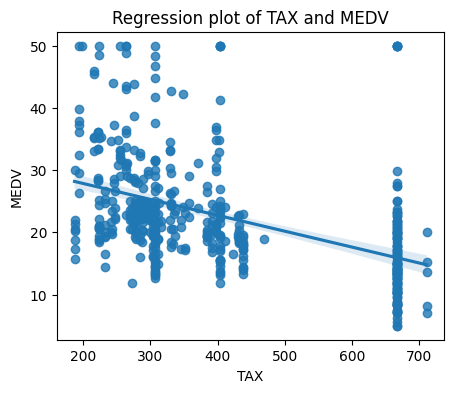

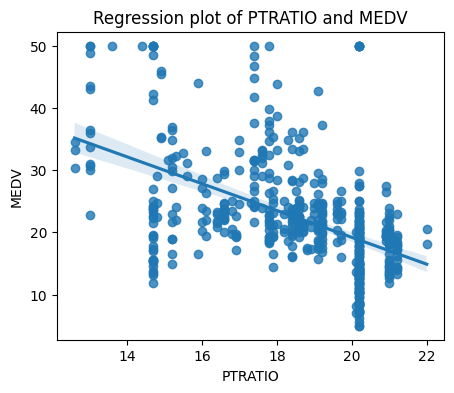

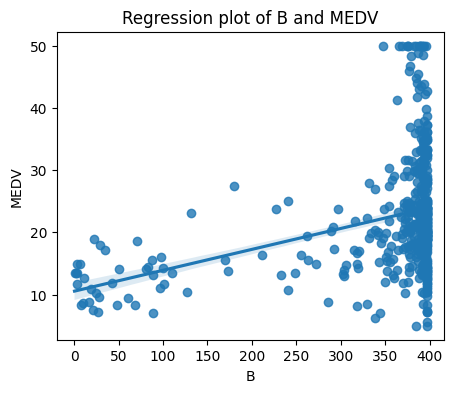

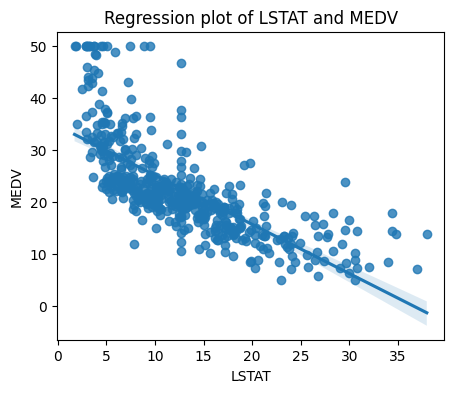

In [24]:
# Relationship between Average house price and other Features

for column in data.columns[:-1]:
    plt.figure(figsize=(5,4))
    sns.regplot(x=data[column], y=data['MEDV'])
    plt.title(f'Regression plot of {column} and MEDV')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.show()

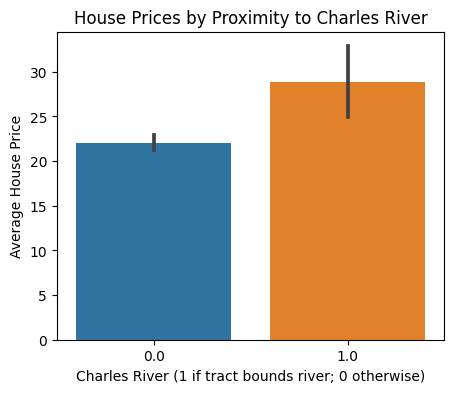

In [25]:
# Average house prices by proximity to the Charles River

plt.figure(figsize=(5,4))
sns.barplot(x='CHAS', y='MEDV', data=data)
plt.title('House Prices by Proximity to Charles River')
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Average House Price')
plt.show()

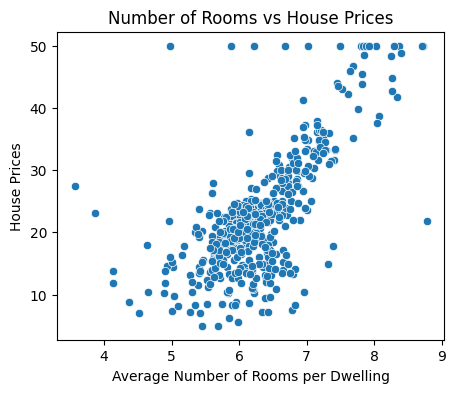

In [26]:
# Relationship between RM (average number of rooms per dwelling) and MEDV (house price)

plt.figure(figsize=(5,4))
sns.scatterplot(x='RM', y='MEDV',data=data)
plt.title('Number of Rooms vs House Prices')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('House Prices')
plt.show()

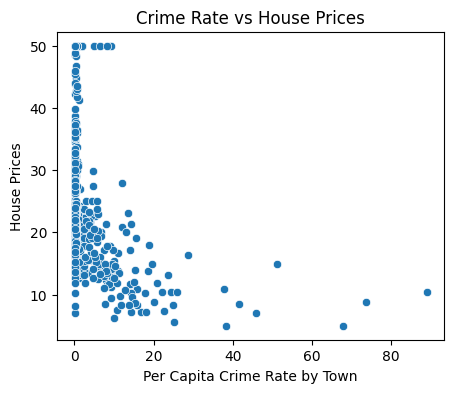

In [27]:
# Relationship between CRIM (per capita crime rate by town) and MEDV (house price)

plt.figure(figsize=(5,4))
sns.scatterplot(x='CRIM', y='MEDV', data=data)
plt.title('Crime Rate vs House Prices')
plt.xlabel('Per Capita Crime Rate by Town')
plt.ylabel('House Prices')
plt.show()


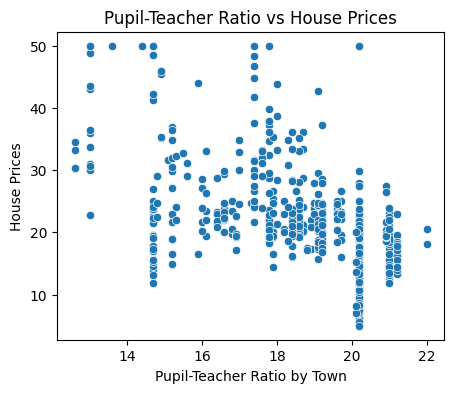

In [28]:
# Relationship between PTRATIO (pupil-teacher ratio by town) and MEDV (house price)

plt.figure(figsize=(5,4))
sns.scatterplot(x='PTRATIO', y='MEDV', data=data)
plt.title('Pupil-Teacher Ratio vs House Prices')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('House Prices')
plt.show()


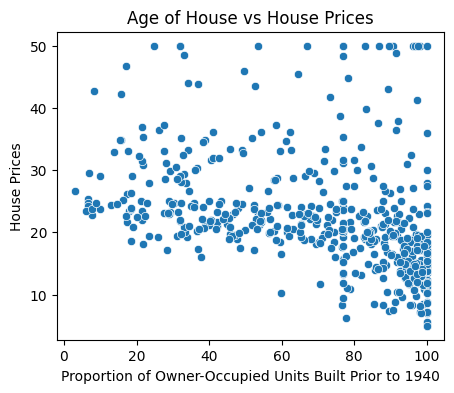

In [29]:
# Relationship between AGE and Aerage house price

plt.figure(figsize=(5,4))
sns.scatterplot(x='AGE', y='MEDV', data=data)
plt.title('Age of House vs House Prices')
plt.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940')
plt.ylabel('House Prices')
plt.show()

Building Machine Learning Models

In [30]:
# Splitting data for Training and Testing

x = data.drop('MEDV', axis=1)
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Simple Linear Regression Model

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [32]:
# Model Evaluationing

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 3.1584994146197096
Mean Squared Error (MSE): 25.072290196306753
Root Mean Squared Error (RMSE): 5.007223801300153
R-squared (R2): 0.6581072308584777


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


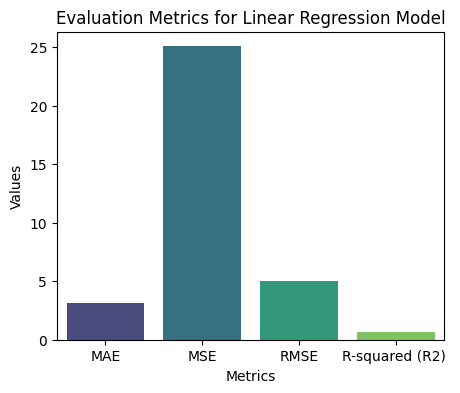

In [34]:
#Evaluation metrics for Linear Regression Model

metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared (R2) ': r2}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.figure(figsize=(5,4))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')
plt.title('Evaluation Metrics for Linear Regression Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

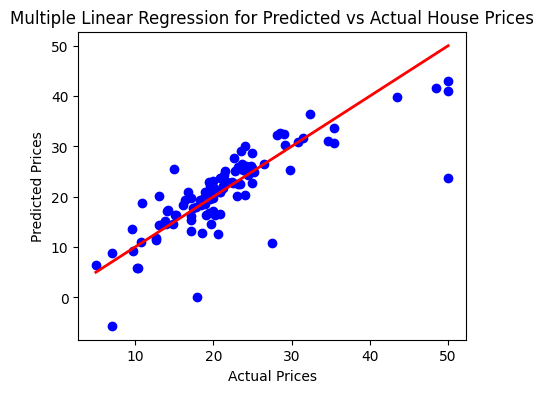

In [35]:
# Multiple Linear Regression

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Multiple Linear Regression for Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

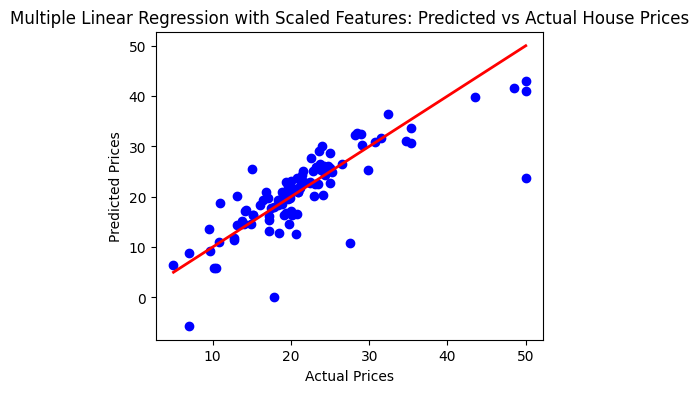

In [36]:
#Scaling the features

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Multiple Linear Regression with Scaled Features: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [37]:
#predict house prices using a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Squared Error: 12.571274509803924
R-squared (R2) Score: 0.8285745809360402


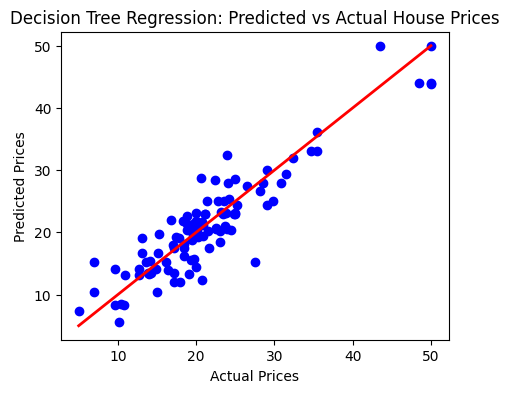

In [38]:
# Decision Tree Regression for predicted and Actual Prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Decision Tree Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [39]:
#predict house prices using a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))


Mean Squared Error: 8.278940480392155
R-squared (R2) Score: 0.8871060495775506


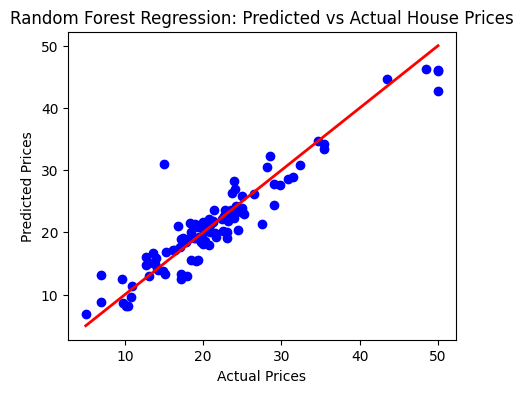

In [40]:
# Random Forest Regession for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [41]:
# predict house prices using a Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.155319376730123
R-squared (R2) Score: 0.9024280615512894


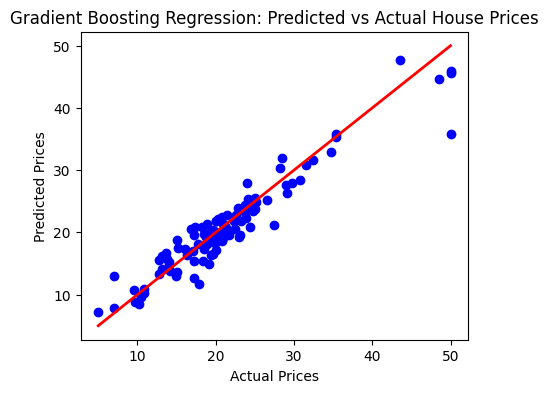

In [42]:
# Gradient Boosting Regession for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Gradient Boosting Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [43]:
#predict house prices using a Support Vector Regressor

from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
y_pred = svr_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Squared Error: 52.931033106567114
R-squared (R2) Score: 0.2782176123267932


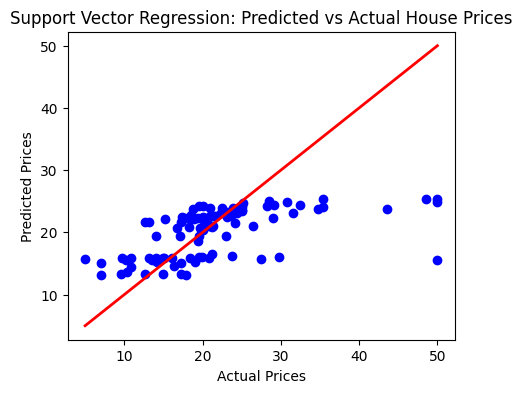

In [44]:
# Support Vector Regession for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Support Vector Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [45]:
#predict house prices using a K-Nearest Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Squared Error: 29.704478431372554
R-squared (R2) Score: 0.5949414151124269


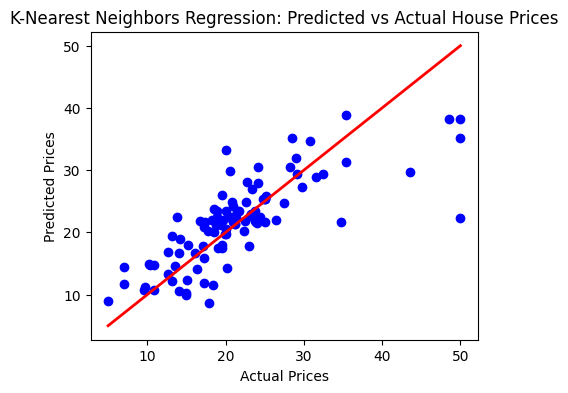

In [46]:
# K-Nearest Neighbors Regession for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('K-Nearest Neighbors Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [47]:
# predict house prices using Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 25.2687878117523
R^2 Score: 0.6554277343566272


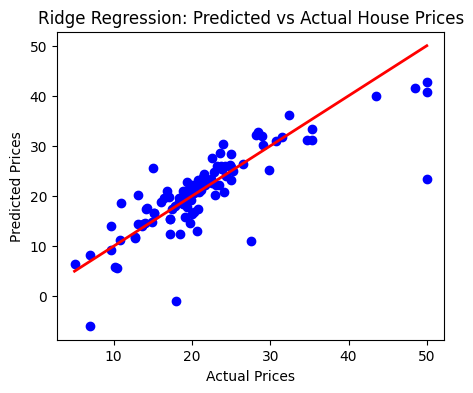

In [48]:
# Ridge Regression for Predicted and Actual prices

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Ridge Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [49]:
# predict house prices using Lasso Regression

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 25.72864216726899
R^2 Score: 0.6491570316095543


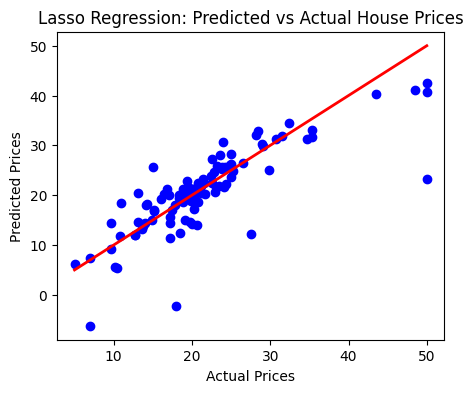

In [50]:
# Lasso Regession for Predicted and Actual prices

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Lasso Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [51]:
# predict house prices using Elastic Net Regression

from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(x_train, y_train)
y_pred = elastic_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 24.91093992270312
R^2 Score: 0.6603074483660197


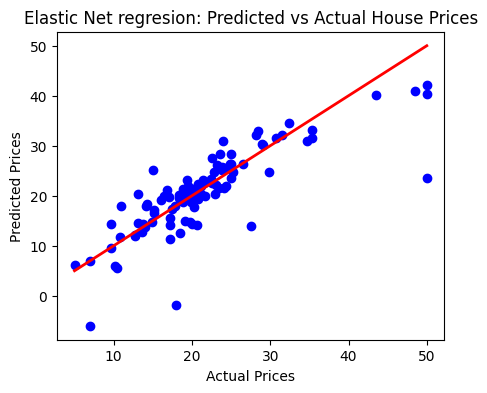

In [52]:
# Elastic Net Regession for Predicted and Actual prices

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Elastic Net regresion: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [53]:
# predict house prices using XGBoost Regressor

import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.537024472117028
R^2 Score: 0.9244955839791882


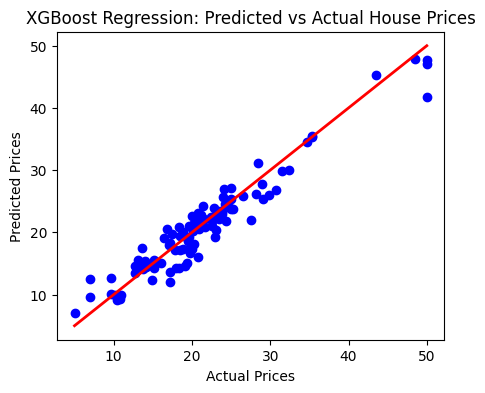

In [54]:
# XGBoost Regession for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('XGBoost Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [55]:
# PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)

xp_train, xp_test, yp_train, yp_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(xp_train, yp_train)
yp_pred = linear_model.predict(xp_test)

print("Mean Squared Error:", mean_squared_error(yp_test, yp_pred))
print("R^2 Score:", r2_score(yp_test, yp_pred))

Mean Squared Error: 24.264297405017974
R^2 Score: 0.6691252467914937


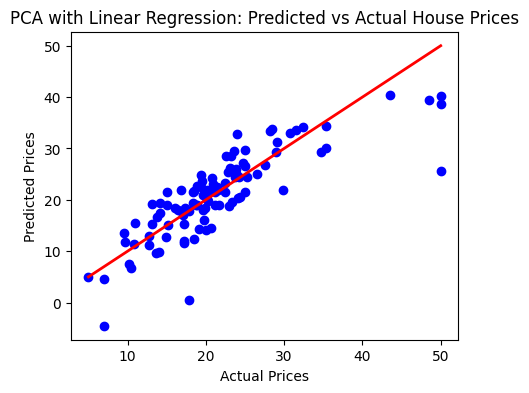

In [56]:
# PCA for Predicted and Actual prices

plt.figure(figsize=(5,4))
plt.scatter(yp_test, yp_pred, color='blue')
plt.plot([min(yp_test), max(yp_test)], [min(yp_test), max(yp_test)], color='red', linewidth=2)
plt.title('PCA with Linear Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [57]:
# compare the performance of different models

from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'Support Vector Regressor': SVR(kernel='rbf')
}

# Compare models using cross-validation
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    results[model_name] = cv_scores

# Print the results
for model_name, cv_scores in results.items():
    print(f"{model_name}: Mean R-squared (R2) Score = {np.mean(cv_scores):.3f}, Std = {np.std(cv_scores):.3f}")
    
# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R-Squared': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)
    evaluation_metrics['R-Squared'].append(r2)

Linear Regression: Mean R-squared (R2) Score = 0.340, Std = 0.392
Decision Tree: Mean R-squared (R2) Score = 0.221, Std = 0.476
Random Forest: Mean R-squared (R2) Score = 0.633, Std = 0.177
Gradient Boosting: Mean R-squared (R2) Score = 0.675, Std = 0.112
Support Vector Regressor: Mean R-squared (R2) Score = -0.093, Std = 0.283


In [58]:
# Convert the evaluation metrics dictionary to a DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Model,MAE,MSE,RMSE,R-Squared
0,Linear Regression,3.158499,25.072290,5.007224,0.658107
1,Decision Tree,2.732353,12.571275,3.545599,0.828575
2,Random Forest,2.050010,8.278940,2.877315,0.887106
3,Gradient Boosting,1.899569,7.155319,2.674943,0.902428
4,Support Vector Regressor,4.524912,52.931033,7.275372,0.278218


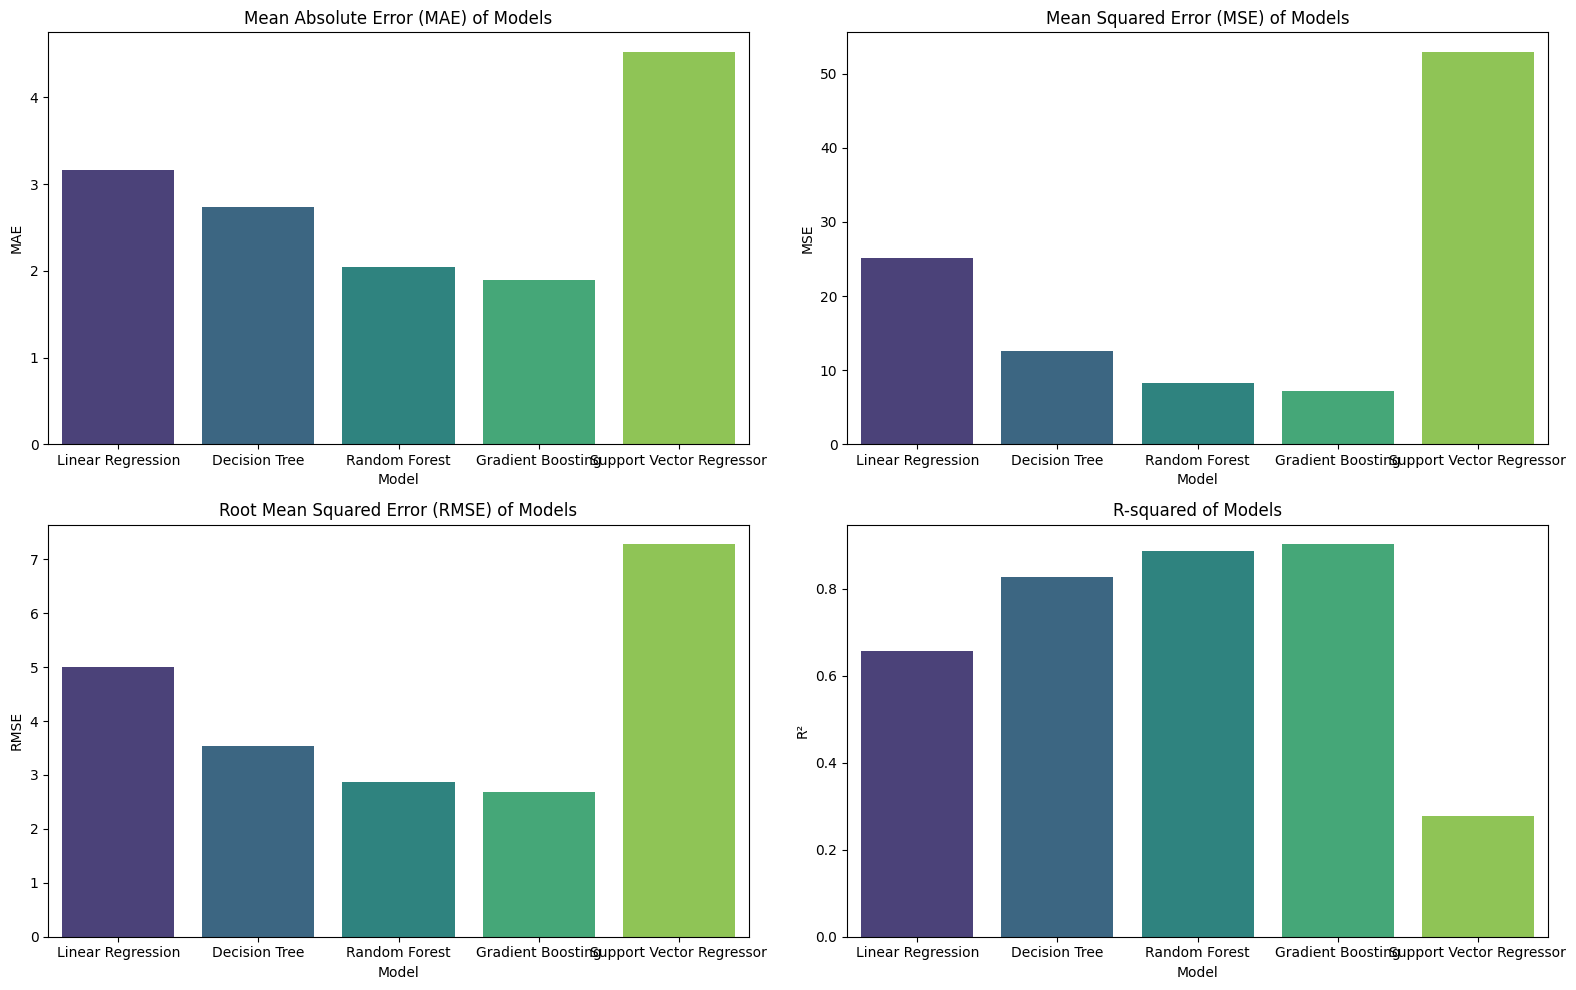

In [59]:
# Plot all evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(16,10))

# MAE plot
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Mean Absolute Error (MAE) of Models')
axs[0, 0].set_xlabel('Model')
axs[0, 0].set_ylabel('MAE')

# MSE plot
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Mean Squared Error (MSE) of Models')
axs[0, 1].set_xlabel('Model')
axs[0, 1].set_ylabel('MSE')

# RMSE plot
sns.barplot(x='Model', y='RMSE', data=evaluation_df, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Root Mean Squared Error (RMSE) of Models')
axs[1, 0].set_xlabel('Model')
axs[1, 0].set_ylabel('RMSE')

# R² plot
sns.barplot(x='Model', y='R-Squared', data=evaluation_df, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('R-squared of Models')
axs[1, 1].set_xlabel('Model')
axs[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

In [60]:
# Clustering the data using KMeans Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


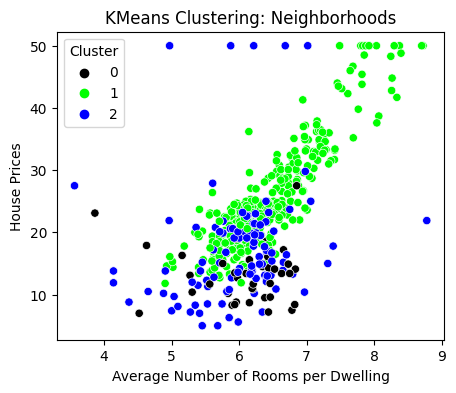

In [61]:
# Visualize the Clustered Data using K-Means Clustering
custom_palette = ['#000000', '#00FF00','#0000FF']
plt.figure(figsize=(5,4))
sns.scatterplot(x='RM', y='MEDV', hue='Cluster', palette=custom_palette, data=data)
plt.title('KMeans Clustering: Neighborhoods')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('House Prices')
plt.show()